In [1]:
#spark.stop()
%run ../connection.python.py

In [2]:
#input
clustering_data_path='/user/stefano.mazzucca/R_digitalizzazione/201809_sm_skyid_imps_aggr_finale.parquet'

In [3]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [4]:
import pyspark.sql.functions as F
import matplotlib
matplotlib.__version__
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import pandas as pd
from scipy import cluster

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
clustering_data= spark.read.format('parquet').load(clustering_data_path).persist()
clustering_data=clustering_data.na.fill(0)
clustering_data.printSchema()
clustering_data.createOrReplaceTempView("clustering_data_view")

root
 |-- skyid: string (nullable = true)
 |-- num_mesi: long (nullable = true)
 |-- num_week: long (nullable = true)
 |-- num_giorni: long (nullable = true)
 |-- imps_tot: long (nullable = true)
 |-- imps_mobile: long (nullable = true)
 |-- imps_tablet: long (nullable = true)
 |-- imps_desktop: long (nullable = true)
 |-- num_device: long (nullable = true)
 |-- num_mobile: long (nullable = true)
 |-- num_tablet: long (nullable = true)
 |-- num_desktop: long (nullable = true)
 |-- num_monday: long (nullable = true)
 |-- num_tuesday: long (nullable = true)
 |-- num_wednesday: long (nullable = true)
 |-- num_thursday: long (nullable = true)
 |-- num_friday: long (nullable = true)
 |-- num_saturday: long (nullable = true)
 |-- num_sunday: long (nullable = true)
 |-- num_imps_monday: long (nullable = true)
 |-- num_imps_tuesday: long (nullable = true)
 |-- num_imps_wednesday: long (nullable = true)
 |-- num_imps_thursday: long (nullable = true)
 |-- num_imps_friday: long (nullable = true)


In [6]:
clustering_data.count()

3785570

In [7]:
clustering_data.show(200, False)

+------------------------------------------------+--------+--------+----------+--------+-----------+-----------+------------+----------+----------+----------+-----------+----------+-----------+-------------+------------+----------+------------+----------+---------------+----------------+------------------+-----------------+---------------+-----------------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+-------------+-------------------+------------------+------------------+--------------------+---------------------+---------------------+-------------------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+-------------------+-

In [8]:
skyid_no_imps=spark.sql("select * from clustering_data_view where imps_tot=0 and num_mesi=0").persist()
skyid_no_imps.createOrReplaceTempView("skyid_no_imps_view")
#skyid_no_imps.printSchema()
skyid_no_imps.count()

705173

In [ ]:
clustering_data_subset=clustering_data.select('num_mesi','num_week','num_giorni','num_device','num_desktop','num_tablet','num_mobile','imps_tot','imps_tablet')

In [ ]:
#visualizzazione istogrammi
clustering_data_viz=clustering_data_subset.toPandas()

In [ ]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_mesi.min(), clustering_data_viz.num_mesi.max()+1,1)) 
plt.hist(clustering_data_viz.num_mesi,bins=np.arange(clustering_data_viz.num_mesi.min(), clustering_data_viz.num_mesi.max()+1,1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(15.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_giorni.min(), clustering_data_viz.num_giorni.max()+1,10)) 
plt.hist(clustering_data_viz.num_giorni,bins=np.arange(clustering_data_viz.num_giorni.min(), clustering_data_viz.num_giorni.max()+1,1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_week.min(), clustering_data_viz.num_week.max()+1,1)) 
plt.hist(clustering_data_viz.num_week,bins=np.arange(clustering_data_viz.num_week.min(), clustering_data_viz.num_week.max()+1,1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_device.min(), clustering_data_viz.num_device.max()+1,1)) 
plt.hist(clustering_data_viz.num_device,bins=np.arange(clustering_data_viz.num_device.min(), clustering_data_viz.num_device.max()+1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_mobile.min(), clustering_data_viz.num_mobile.max()+1,1)) 
plt.hist(clustering_data_viz.num_mobile,bins=np.arange(clustering_data_viz.num_mobile.min(), clustering_data_viz.num_mobile.max()+1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_tablet.min(), clustering_data_viz.num_tablet.max()+1,1)) 
plt.hist(clustering_data_viz.num_tablet,bins=np.arange(clustering_data_viz.num_tablet.min(), clustering_data_viz.num_tablet.max()+1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(7.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_xticks(np.arange(clustering_data_viz.num_desktop.min(), clustering_data_viz.num_desktop.max()+1,1)) 
plt.hist(clustering_data_viz.num_desktop,bins=np.arange(clustering_data_viz.num_desktop.min(), clustering_data_viz.num_desktop.max()+1),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(17.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_ylim([0,100000])
ax.set_xticks(np.arange(clustering_data_viz.imps_tot.min(), 15000+1,1000)) 
plt.hist(clustering_data_viz.imps_tot,bins=np.arange(clustering_data_viz.imps_tot.min(), 15000,10),align='left')
plt.show()

In [ ]:
fig = plt.figure()
fig.set_size_inches(17.5, 5.5)
ax = fig.add_subplot(111)
ax.grid()
ax.set_ylim([0,1])
ax.set_xticks(np.arange(clustering_data_viz.imps_tablet.min(),15000+1,1000)) 
plt.hist(clustering_data_viz.imps_tablet,bins=np.arange(clustering_data_viz.imps_tablet.min()+1, 15000+1,1),align='left',cumulative='True',normed='True')
plt.show()

In [ ]:
clustering_data=spark.sql("select skyid, cast(num_mesi as double),cast(num_week as double),cast(num_giorni as double),cast(imps_tot as double),cast(imps_mobile as double),cast(imps_tablet as double),cast(imps_desktop as double),cast(num_device as double),cast(num_mobile as double),cast(num_tablet as double),cast(num_desktop as double),cast(num_monday as double),cast(num_tuesday as double),cast(num_wednesday as double),cast(num_thursday as double),cast(num_friday as double),cast(num_saturday as double),cast(num_sunday as double),cast(num_imps_monday as double),cast(num_imps_tuesday as double),cast(num_imps_wednesday as double),cast(num_imps_thursday as double),cast(num_imps_friday as double),cast(num_imps_saturday as double),cast(num_imps_sunday as double),cast(num_imps_0_1 as double),cast(num_imps_1_2 as double),cast(num_imps_2_3 as double),cast(num_imps_3_4 as double),cast(num_imps_4_5 as double),cast(num_imps_5_6 as double),cast(num_imps_6_7 as double),cast(num_imps_7_8 as double),cast(num_imps_8_9 as double),cast(num_imps_9_10 as double),cast(num_imps_10_11 as double),cast(num_imps_11_12 as double),cast(num_imps_12_13 as double),cast(num_imps_13_14 as double),cast(num_imps_14_15 as double),cast(num_imps_15_16 as double),cast(num_imps_16_17 as double),cast(num_imps_17_18 as double),cast(num_imps_18_19 as double),cast(num_imps_19_20 as double),cast(num_imps_20_21 as double),cast(num_imps_21_22 as double),cast(num_imps_22_23 as double),cast(num_imps_23_0 as double),perc_mobile,perc_tablet,perc_desktop,num_imps_per_giorno,num_imps_per_mese,num_imps_per_week,perc_imps_mobile,perc_imps_tablet,perc_imps_desktop,perc_monday,perc_tuesday,perc_wednesday,perc_thursday,perc_friday,perc_saturday,perc_sunday,perc_imps_monday,perc_imps_tuesday,perc_imps_wednesday,perc_imps_thursday,perc_imps_friday,perc_imps_saturday,perc_imps_sunday,perc_imps_0_1,perc_imps_1_2,perc_imps_2_3,perc_imps_3_4,perc_imps_4_5,perc_imps_5_6,perc_imps_6_7,perc_imps_7_8,perc_imps_8_9,perc_imps_9_10,perc_imps_10_11,perc_imps_11_12,perc_imps_12_13,perc_imps_13_14,perc_imps_14_15,perc_imps_15_16,perc_imps_16_17,perc_imps_17_18,perc_imps_18_19,perc_imps_19_20,perc_imps_20_21,perc_imps_21_22,perc_imps_22_23,perc_imps_23_0 from clustering_data_view").persist()
clustering_data.printSchema()

In [ ]:
clustering_data.show(100)

In [ ]:
from pyspark.ml.feature import QuantileDiscretizer

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_giorni", outputCol="num_giorni_bins")
clustering_data_features_step0 = discretizer.fit(clustering_data).transform(clustering_data)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_week", outputCol="num_week_bins")
clustering_data_features_step1 = discretizer.fit(clustering_data_features_step0).transform(clustering_data_features_step0)


In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="imps_tot", outputCol="imps_tot_bins")
clustering_data_features_step2 = discretizer.fit(clustering_data_features_step1).transform(clustering_data_features_step1)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="imps_mobile", outputCol="imps_mobile_bins")
clustering_data_features_step3 = discretizer.fit(clustering_data_features_step2).transform(clustering_data_features_step2)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="imps_tablet", outputCol="imps_tablet_bins")
clustering_data_features_step4 = discretizer.fit(clustering_data_features_step3).transform(clustering_data_features_step3)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="imps_desktop", outputCol="imps_desktop_bins")
clustering_data_features_step5 = discretizer.fit(clustering_data_features_step4).transform(clustering_data_features_step4)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_per_giorno", outputCol="num_imps_per_giorno_bins")
clustering_data_features_step6 = discretizer.fit(clustering_data_features_step5).transform(clustering_data_features_step5)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_per_week", outputCol="num_imps_per_week_bins")
clustering_data_features_step7 = discretizer.fit(clustering_data_features_step6).transform(clustering_data_features_step6)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_per_mese", outputCol="num_imps_per_mese_bins")
clustering_data_features_step8 = discretizer.fit(clustering_data_features_step7).transform(clustering_data_features_step7)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_mobile", outputCol="perc_mobile_bins")
clustering_data_features_step9 = discretizer.fit(clustering_data_features_step8).transform(clustering_data_features_step8)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_tablet", outputCol="perc_tablet_bins")
clustering_data_features_step10 = discretizer.fit(clustering_data_features_step9).transform(clustering_data_features_step9)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_desktop", outputCol="perc_desktop_bins")
clustering_data_features_step11 = discretizer.fit(clustering_data_features_step10).transform(clustering_data_features_step10)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_0_1", outputCol="num_imps_0_1_bins")
clustering_data_features_step12 = discretizer.fit(clustering_data_features_step11).transform(clustering_data_features_step11)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_1_2", outputCol="num_imps_1_2_bins")
clustering_data_features_step13 = discretizer.fit(clustering_data_features_step12).transform(clustering_data_features_step12)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_2_3", outputCol="num_imps_2_3_bins")
clustering_data_features_step14 = discretizer.fit(clustering_data_features_step13).transform(clustering_data_features_step13)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_3_4", outputCol="num_imps_3_4_bins")
clustering_data_features_step15 = discretizer.fit(clustering_data_features_step14).transform(clustering_data_features_step14)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_4_5", outputCol="num_imps_4_5_bins")
clustering_data_features_step16 = discretizer.fit(clustering_data_features_step15).transform(clustering_data_features_step15)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_5_6", outputCol="num_imps_5_6_bins")
clustering_data_features_step17 = discretizer.fit(clustering_data_features_step16).transform(clustering_data_features_step16)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_6_7", outputCol="num_imps_6_7_bins")
clustering_data_features_step18 = discretizer.fit(clustering_data_features_step17).transform(clustering_data_features_step17)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_7_8", outputCol="num_imps_7_8_bins")
clustering_data_features_step19 = discretizer.fit(clustering_data_features_step18).transform(clustering_data_features_step18)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_8_9", outputCol="num_imps_8_9_bins")
clustering_data_features_step20 = discretizer.fit(clustering_data_features_step19).transform(clustering_data_features_step19)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_9_10", outputCol="num_imps_9_10_bins")
clustering_data_features_step21 = discretizer.fit(clustering_data_features_step20).transform(clustering_data_features_step20)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_10_11", outputCol="num_imps_10_11_bins")
clustering_data_features_step22 = discretizer.fit(clustering_data_features_step21).transform(clustering_data_features_step21)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_11_12", outputCol="num_imps_11_12_bins")
clustering_data_features_step23 = discretizer.fit(clustering_data_features_step22).transform(clustering_data_features_step22)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_12_13", outputCol="num_imps_12_13_bins")
clustering_data_features_step24 = discretizer.fit(clustering_data_features_step23).transform(clustering_data_features_step23)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_13_14", outputCol="num_imps_13_14_bins")
clustering_data_features_step25 = discretizer.fit(clustering_data_features_step24).transform(clustering_data_features_step24)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_14_15", outputCol="num_imps_14_15_bins")
clustering_data_features_step26 = discretizer.fit(clustering_data_features_step25).transform(clustering_data_features_step25)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_15_16", outputCol="num_imps_15_16_bins")
clustering_data_features_step27 = discretizer.fit(clustering_data_features_step26).transform(clustering_data_features_step26)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_16_17", outputCol="num_imps_16_17_bins")
clustering_data_features_step28 = discretizer.fit(clustering_data_features_step27).transform(clustering_data_features_step27)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_17_18", outputCol="num_imps_17_18_bins")
clustering_data_features_step29 = discretizer.fit(clustering_data_features_step28).transform(clustering_data_features_step28)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_18_19", outputCol="num_imps_18_19_bins")
clustering_data_features_step30 = discretizer.fit(clustering_data_features_step29).transform(clustering_data_features_step29)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_19_20", outputCol="num_imps_19_20_bins")
clustering_data_features_step31 = discretizer.fit(clustering_data_features_step30).transform(clustering_data_features_step30)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_20_21", outputCol="num_imps_20_21_bins")
clustering_data_features_step32 = discretizer.fit(clustering_data_features_step31).transform(clustering_data_features_step31)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_21_22", outputCol="num_imps_21_22_bins")
clustering_data_features_step33 = discretizer.fit(clustering_data_features_step32).transform(clustering_data_features_step32)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_22_23", outputCol="num_imps_22_23_bins")
clustering_data_features_step34 = discretizer.fit(clustering_data_features_step33).transform(clustering_data_features_step33)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="num_imps_23_0", outputCol="num_imps_23_0_bins")
clustering_data_features_step35 = discretizer.fit(clustering_data_features_step34).transform(clustering_data_features_step34)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_monday", outputCol="num_monday_bins")
clustering_data_features_step37 = discretizer.fit(clustering_data_features_step35).transform(clustering_data_features_step35)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_tuesday", outputCol="num_tuesday_bins")
clustering_data_features_step38 = discretizer.fit(clustering_data_features_step37).transform(clustering_data_features_step37)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_wednesday", outputCol="num_wednesday_bins")
clustering_data_features_step39 = discretizer.fit(clustering_data_features_step38).transform(clustering_data_features_step38)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_thursday", outputCol="num_thursday_bins")
clustering_data_features_step40 = discretizer.fit(clustering_data_features_step39).transform(clustering_data_features_step39)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_friday", outputCol="num_friday_bins")
clustering_data_features_step41 = discretizer.fit(clustering_data_features_step40).transform(clustering_data_features_step40)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_saturday", outputCol="num_saturday_bins")
clustering_data_features_step42 = discretizer.fit(clustering_data_features_step41).transform(clustering_data_features_step41)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_sunday", outputCol="num_sunday_bins")
clustering_data_features_step43 = discretizer.fit(clustering_data_features_step42).transform(clustering_data_features_step42)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_monday", outputCol="num_imps_monday_bins")
clustering_data_features_step44 = discretizer.fit(clustering_data_features_step43).transform(clustering_data_features_step43)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_tuesday", outputCol="num_imps_tuesday_bins")
clustering_data_features_step45 = discretizer.fit(clustering_data_features_step44).transform(clustering_data_features_step44)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_wednesday", outputCol="num_imps_wednesday_bins")
clustering_data_features_step46 = discretizer.fit(clustering_data_features_step45).transform(clustering_data_features_step45)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_thursday", outputCol="num_imps_thursday_bins")
clustering_data_features_step47 = discretizer.fit(clustering_data_features_step46).transform(clustering_data_features_step46)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_friday", outputCol="num_imps_friday_bins")
clustering_data_features_step48 = discretizer.fit(clustering_data_features_step47).transform(clustering_data_features_step47)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_saturday", outputCol="num_imps_saturday_bins")
clustering_data_features_step49 = discretizer.fit(clustering_data_features_step48).transform(clustering_data_features_step48)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="num_imps_sunday", outputCol="num_imps_sunday_bins")
clustering_data_features_step50 = discretizer.fit(clustering_data_features_step49).transform(clustering_data_features_step49)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_monday", outputCol="perc_monday_bins")
clustering_data_features_step51 = discretizer.fit(clustering_data_features_step50).transform(clustering_data_features_step50)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_tuesday", outputCol="perc_tuesday_bins")
clustering_data_features_step52 = discretizer.fit(clustering_data_features_step51).transform(clustering_data_features_step51)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_wednesday", outputCol="perc_wednesday_bins")
clustering_data_features_step53 = discretizer.fit(clustering_data_features_step52).transform(clustering_data_features_step52)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_thursday", outputCol="perc_thursday_bins")
clustering_data_features_step54 = discretizer.fit(clustering_data_features_step53).transform(clustering_data_features_step53)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_friday", outputCol="perc_friday_bins")
clustering_data_features_step55 = discretizer.fit(clustering_data_features_step54).transform(clustering_data_features_step54)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_saturday", outputCol="perc_saturday_bins")
clustering_data_features_step56 = discretizer.fit(clustering_data_features_step55).transform(clustering_data_features_step55)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_sunday", outputCol="perc_sunday_bins")
clustering_data_features_step57 = discretizer.fit(clustering_data_features_step56).transform(clustering_data_features_step56)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_monday", outputCol="perc_imps_monday_bins")
clustering_data_features_step58 = discretizer.fit(clustering_data_features_step57).transform(clustering_data_features_step57)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_tuesday", outputCol="perc_imps_tuesday_bins")
clustering_data_features_step59 = discretizer.fit(clustering_data_features_step58).transform(clustering_data_features_step58)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_wednesday", outputCol="perc_imps_wednesday_bins")
clustering_data_features_step60 = discretizer.fit(clustering_data_features_step59).transform(clustering_data_features_step59)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_thursday", outputCol="perc_imps_thursday_bins")
clustering_data_features_step61 = discretizer.fit(clustering_data_features_step60).transform(clustering_data_features_step60)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_friday", outputCol="perc_imps_friday_bins")
clustering_data_features_step62 = discretizer.fit(clustering_data_features_step61).transform(clustering_data_features_step61)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_saturday", outputCol="perc_imps_saturday_bins")
clustering_data_features_step63 = discretizer.fit(clustering_data_features_step62).transform(clustering_data_features_step62)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=5, inputCol="perc_imps_sunday", outputCol="perc_imps_sunday_bins")
clustering_data_features_step64 = discretizer.fit(clustering_data_features_step63).transform(clustering_data_features_step63)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_mobile", outputCol="perc__imps_mobile_bins")
clustering_data_features_step65 = discretizer.fit(clustering_data_features_step64).transform(clustering_data_features_step64)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_tablet", outputCol="perc_imps_tablet_bins")
clustering_data_features_step66 = discretizer.fit(clustering_data_features_step65).transform(clustering_data_features_step65)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_desktop", outputCol="perc_imps_desktop_bins")
clustering_data_features_step67 = discretizer.fit(clustering_data_features_step66).transform(clustering_data_features_step66)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_0_1", outputCol="perc_imps_0_1_bins")
clustering_data_features_step68 = discretizer.fit(clustering_data_features_step67).transform(clustering_data_features_step67)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_1_2", outputCol="perc_imps_1_2_bins")
clustering_data_features_step69 = discretizer.fit(clustering_data_features_step68).transform(clustering_data_features_step68)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_2_3", outputCol="perc_imps_2_3_bins")
clustering_data_features_step70 = discretizer.fit(clustering_data_features_step69).transform(clustering_data_features_step69)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_3_4", outputCol="perc_imps_3_4_bins")
clustering_data_features_step71 = discretizer.fit(clustering_data_features_step70).transform(clustering_data_features_step70)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_4_5", outputCol="perc_imps_4_5_bins")
clustering_data_features_step72 = discretizer.fit(clustering_data_features_step71).transform(clustering_data_features_step71)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_5_6", outputCol="perc_imps_5_6_bins")
clustering_data_features_step73 = discretizer.fit(clustering_data_features_step72).transform(clustering_data_features_step72)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_6_7", outputCol="perc_imps_6_7_bins")
clustering_data_features_step74 = discretizer.fit(clustering_data_features_step73).transform(clustering_data_features_step73)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_7_8", outputCol="perc_imps_7_8_bins")
clustering_data_features_step75 = discretizer.fit(clustering_data_features_step74).transform(clustering_data_features_step74)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_8_9", outputCol="perc_imps_8_9_bins")
clustering_data_features_step76 = discretizer.fit(clustering_data_features_step75).transform(clustering_data_features_step75)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_9_10", outputCol="perc_imps_9_10_bins")
clustering_data_features_step77 = discretizer.fit(clustering_data_features_step76).transform(clustering_data_features_step76)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_10_11", outputCol="perc_imps_10_11_bins")
clustering_data_features_step78 = discretizer.fit(clustering_data_features_step77).transform(clustering_data_features_step77)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_11_12", outputCol="perc_imps_11_12_bins")
clustering_data_features_step79 = discretizer.fit(clustering_data_features_step78).transform(clustering_data_features_step78)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_12_13", outputCol="perc_imps_12_13_bins")
clustering_data_features_step80 = discretizer.fit(clustering_data_features_step79).transform(clustering_data_features_step79)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_13_14", outputCol="perc_imps_13_14_bins")
clustering_data_features_step81 = discretizer.fit(clustering_data_features_step80).transform(clustering_data_features_step80)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_14_15", outputCol="perc_imps_14_15_bins")
clustering_data_features_step82 = discretizer.fit(clustering_data_features_step81).transform(clustering_data_features_step81)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_15_16", outputCol="perc_imps_15_16_bins")
clustering_data_features_step83 = discretizer.fit(clustering_data_features_step82).transform(clustering_data_features_step82)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_16_17", outputCol="perc_imps_16_17_bins")
clustering_data_features_step84 = discretizer.fit(clustering_data_features_step83).transform(clustering_data_features_step83)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_17_18", outputCol="perc_imps_17_18_bins")
clustering_data_features_step85 = discretizer.fit(clustering_data_features_step84).transform(clustering_data_features_step84)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_18_19", outputCol="perc_imps_18_19_bins")
clustering_data_features_step86 = discretizer.fit(clustering_data_features_step85).transform(clustering_data_features_step85)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_19_20", outputCol="perc_imps_19_20_bins")
clustering_data_features_step87 = discretizer.fit(clustering_data_features_step86).transform(clustering_data_features_step86)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_20_21", outputCol="perc_imps_20_21_bins")
clustering_data_features_step88 = discretizer.fit(clustering_data_features_step87).transform(clustering_data_features_step87)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_21_22", outputCol="perc_imps_21_22_bins")
clustering_data_features_step89 = discretizer.fit(clustering_data_features_step88).transform(clustering_data_features_step88)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_22_23", outputCol="perc_imps_22_23_bins")
clustering_data_features_step90 = discretizer.fit(clustering_data_features_step89).transform(clustering_data_features_step89)

In [ ]:
discretizer = QuantileDiscretizer(numBuckets=10, inputCol="perc_imps_23_0", outputCol="perc_imps_23_0_bins")
clustering_data_features_step91 = discretizer.fit(clustering_data_features_step90).transform(clustering_data_features_step90)

In [ ]:
clustering_data_features_step91.show(1)

In [ ]:
clustering_data_features=clustering_data_features_step91.persist()
clustering_data_features=clustering_data_features.na.fill(0)
clustering_data_features.show(10)

In [ ]:
clustering_data_features.printSchema()

In [ ]:
#clustering_data_features.write.parquet("clustering_data_features_20180606",mode="overwrite")

In [ ]:
ignore = ['skyid','num_giorni','num_week','imps_tot','imps_tablet','imps_desktop','imps_mobile','num_monday'	,'num_tuesday'	,'num_wednesday'	,'num_thursday'	,'num_friday'	,'num_saturday'	,'num_sunday'	,'num_imps_monday'	,'num_imps_tuesday'	,'num_imps_wednesday'	,'num_imps_thursday'	,'num_imps_friday'	,'num_imps_saturday'	,'num_imps_sunday'	,'num_imps_0_1'	,'num_imps_1_2'	,'num_imps_2_3'	,'num_imps_3_4'	,'num_imps_4_5'	,'num_imps_5_6'	,'num_imps_6_7'	,'num_imps_7_8'	,'num_imps_8_9'	,'num_imps_9_10'	,'num_imps_10_11'	,'num_imps_11_12'	,'num_imps_12_13'	,'num_imps_13_14'	,'num_imps_14_15'	,'num_imps_15_16'	,'num_imps_16_17'	,'num_imps_17_18'	,'num_imps_18_19'	,'num_imps_19_20'	,'num_imps_20_21'	,'num_imps_21_22'	,'num_imps_22_23'	,'num_imps_23_0'	,'perc_mobile'	,'perc_tablet'	,'perc_desktop'	,'num_imps_per_giorno'	,'num_imps_per_mese'	,'num_imps_per_week'
,'perc_imps_mobile','perc_imps_tablet','perc_imps_desktop','perc_monday','perc_tuesday','perc_wednesday','perc_thursday','perc_friday','perc_saturday','perc_sunday','perc_imps_monday','perc_imps_tuesday','perc_imps_wednesday','perc_imps_thursday','perc_imps_friday','perc_imps_saturday','perc_imps_sunday','perc_imps_0_1','perc_imps_1_2','perc_imps_2_3','perc_imps_3_4','perc_imps_4_5','perc_imps_5_6','perc_imps_6_7','perc_imps_7_8','perc_imps_8_9','perc_imps_9_10','perc_imps_10_11','perc_imps_11_12','perc_imps_12_13','perc_imps_13_14','perc_imps_14_15','perc_imps_15_16','perc_imps_16_17','perc_imps_17_18','perc_imps_18_19','perc_imps_19_20','perc_imps_20_21','perc_imps_21_22','perc_imps_22_23','perc_imps_23_0']
assembler = VectorAssembler(
    inputCols=[x for x in clustering_data_features.columns if x not in ignore], 
    outputCol='features')

In [ ]:
parsedData =  assembler.transform(clustering_data_features).persist()
parsedData.show(20,False)

In [ ]:
parsedData.printSchema()

In [119]:
#parsedData.select('features').show(10,False)
#parsedData.show(10,False)

In [ ]:
parsedData = parsedData['skyid', 'features']

In [ ]:
parsedData.show(10,False)

In [ ]:
parsedData = parsedData.select( col("features").alias("features"), col("skyid").alias("label"))

In [ ]:
parsedData.show(10,False)

In [ ]:
wssse_v=[]
x_v=[]
for x in range(2, 10):
    kmeans = KMeans().setK(x).setSeed(1)
    model = kmeans.fit(parsedData)
    wssse_v.append(model.computeCost(parsedData))
    x_v.append(x)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()

fig.autofmt_xdate()

plt.plot(x_v,wssse_v)
plt.show()

In [ ]:
# Trains a k-means model.
kmeans_best = KMeans().setK(5).setSeed(1)
model_best = kmeans_best.fit(parsedData)

In [ ]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse_best = model_best.computeCost(parsedData)
print("Within Set Sum of Squared Errors = " + str(wssse_best))

In [ ]:
# Shows the result.
centers_best = model_best.clusterCenters()
print("Cluster Centers: ")
for center in centers_best:
    print(center)

In [ ]:
summary_best = model_best.summary
#summary.k 
summary_best.clusterSizes

In [ ]:
transformed = model_best.transform(parsedData).select("label","features", "prediction").persist()

In [ ]:
transformed.write.parquet("/user/stefano.mazzucca/digitalizzazione/sm_cluster_k_5_new",mode="overwrite")

In [138]:
transformed.show(10,False)

+------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|label                                           |features                                                                                                                                                                                                                                                                                                                                                                                         |prediction|
+------------------------------------------------+------------------------------------------------------

In [132]:
#transformed.select('features').where('prediction=2').show(10,False)

In [139]:
transformed_sample=transformed.sample(False, 0.01, 42)

In [140]:
transformed_sample.count()
#transformed_sample.show()
#transformed_sample.dtypes

38060

In [141]:
transformed_sample_viz = transformed_sample.toPandas()

In [136]:
#list(transformed_sample_viz)
#transformed_sample_viz

In [142]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()

fig.autofmt_xdate()

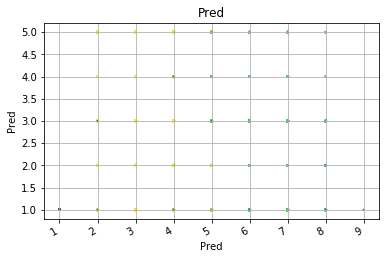

In [143]:
num_mesi=[]
num_week=[]
num_giorni=[]
imps_tot=[]
imps_mobile=[]
imps_tablet=[]
imps_desktop=[]
num_device=[]
num_mobile=[]
num_tablet=[]
num_desktop=[]
perc_mobile=[]
perc_tablet=[]
perc_desktop=[]
num_imps_per_giorno=[]
num_imps_per_mese=[]
num_imps_per_week=[]
cluster=[]

for var_one, var_two in zip(transformed_sample_viz['features'].values, transformed_sample_viz['prediction']):
    #print(str(var_one[1])+" - "+str(var_two))
    num_mesi.append(var_one[0])
    num_week.append(var_one[1])
    num_giorni.append(var_one[2])
    imps_tot.append(var_one[3])
    imps_mobile.append(var_one[4])
    imps_tablet.append(var_one[5])
    imps_desktop.append(var_one[6])
    num_device.append(var_one[7])
    num_mobile.append(var_one[8])
    num_tablet.append(var_one[9])
    num_desktop.append(var_one[10])
    perc_mobile.append(var_one[11])
    perc_tablet.append(var_one[12])
    perc_desktop.append(var_one[13])
    num_imps_per_giorno.append(var_one[14])
    num_imps_per_mese.append(var_one[15])
    num_imps_per_week.append(var_one[16])
    cluster.append(var_two)

plt.scatter(num_device,num_imps_per_giorno, s=cluster, c=cluster)
plt.xlabel('Pred')
plt.ylabel('Pred')
plt.title('Pred')
plt.show()

In [144]:
# Trains a k-means model.
kmeans_6k = KMeans().setK(6).setSeed(1)
model_6k = kmeans_6k.fit(parsedData)

In [145]:
# Evaluate clustering by computing Within Set Sum of Squared Errors.
wssse_6k = model_6k.computeCost(parsedData)
print("Within Set Sum of Squared Errors = " + str(wssse_6k))

Within Set Sum of Squared Errors = 391591734.74224216


In [146]:
# Shows the result.
centers_6k = model_6k.clusterCenters()
print("Cluster Centers: ")
for center in centers_6k:
    print(center)

Cluster Centers: 
[ 5.88767551  2.30976509  1.16221543  0.37667108  0.77083461  8.39946042
  3.78871965  8.59103408  5.48288994  1.50303162  2.76163062  8.53541597
  8.57521094  8.58460652  3.269711    1.38975077  1.99708381  5.56144814
  4.51751993  3.48304383  3.4863856   3.48651437  3.51221676  4.51782144
  5.54537374  5.52223107  6.53119322  6.53438737  6.53693767  6.54506909
  6.56658328  6.56690521  6.56257881  6.55293355  6.55320679  6.55865444
  6.56364196  6.56143401  6.54403892  5.51837265  5.50518775  3.85867846
  3.86829232  3.87636878  3.87641275  3.86452498  3.86567136  3.88314183
  3.97661078  3.98188411  3.98375286  3.98803999  3.99681056  3.99652318
  3.99113678  2.64151077  2.62236471  2.63469375  2.69152733  2.32112521
  2.71808715  2.6716746   2.38601954  2.41022537  2.42834754  2.50840859
  2.97256862  3.00504092  2.91235872  4.25721393  1.26506268  1.57716763
  4.037832    3.17004848  2.46629417  2.66377717  2.71371051  2.62262539
  3.32040597  3.99902008  3.34977

In [147]:
summary_6k = model_6k.summary
#summary.k 
summary_6k.clusterSizes

[645028, 886563, 740828, 406560, 560586, 546005]

In [148]:
transformed_6k = model_6k.transform(parsedData).select("label","features", "prediction").persist()

In [149]:
transformed_6k.write.parquet("/user/stefano.mazzucca/digitalizzazione/sm_cluster_k_6",mode="overwrite")

In [150]:
transformed_6k.createOrReplaceTempView("cluster_6k_view")

In [157]:
cluster_6k_score=spark.sql('select label as skyid, prediction as cluster, case when prediction=0 then 10 when prediction=1 then 2 when prediction=2 then 4 when prediction=3 then 6 when prediction=4 then 6 when prediction=5 then 8 else null end as cluster_score  from cluster_6k_view').persist()

In [158]:
cluster_6k_score.show(10)

+--------------------+-------+-------------+
|               skyid|cluster|cluster_score|
+--------------------+-------+-------------+
|0005f3f18bda8a53a...|      4|            6|
|000607b14d7652547...|      1|            2|
|0006530d860a31ca2...|      4|            6|
|0006b83f9d38ac301...|      2|            4|
|000ae1a773010077d...|      1|            2|
|000aec8698c204eca...|      5|            8|
|000effd99733aebfe...|      2|            4|
|000fd3e0c929462b3...|      0|           10|
|001516de23bee4c89...|      1|            2|
|001a2224a6e43beef...|      5|            8|
+--------------------+-------+-------------+
only showing top 10 rows



In [159]:
cluster_6k_score.createOrReplaceTempView("cluster_6k_score")

In [160]:
spark.sql('select cluster_score, count(*) from cluster_6k_score group by 1').show(10)

+-------------+--------+
|cluster_score|count(1)|
+-------------+--------+
|            6|  967146|
|            4|  740828|
|            8|  546005|
|           10|  645028|
|            2|  886563|
+-------------+--------+



In [161]:
cluster_6k_score.write.parquet("/user/stefano.mazzucca/digitalizzazione/sm_cluster_k_6_score",mode="overwrite")

In [162]:
cluster_6k_score.count()

3785570

In [163]:
prova = spark.read.format('parquet').load("/user/stefano.mazzucca/digitalizzazione/sm_cluster_k_6_score").persist()

In [164]:
prova.show(10)

+--------------------+-------+-------------+
|               skyid|cluster|cluster_score|
+--------------------+-------+-------------+
|0005f3f18bda8a53a...|      4|            6|
|000607b14d7652547...|      1|            2|
|0006530d860a31ca2...|      4|            6|
|0006b83f9d38ac301...|      2|            4|
|000ae1a773010077d...|      1|            2|
|000aec8698c204eca...|      5|            8|
|000effd99733aebfe...|      2|            4|
|000fd3e0c929462b3...|      0|           10|
|001516de23bee4c89...|      1|            2|
|001a2224a6e43beef...|      5|            8|
+--------------------+-------+-------------+
only showing top 10 rows



In [165]:
prova.count()

3785570